# GATHERING :

In [49]:
import requests
import pandas as pd
import numpy as np
import tweepy
import json
import time
import matplotlib.pyplot as plt
import os
import re

GATHER TWITTER ARCHIVE 

In [50]:

twitter_archive_raw = pd.read_csv('twitter-archive-enhanced.csv',encoding='cp1252')



GETTING IMAGES PREDICTION USING URL

In [51]:


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
   

GATHERING TWITTER STATUS USING API

In [4]:

consumer_key = "xxxx"
consumer_secret = "xxxx"
access_token = "xxxx"
access_secret = "xxxx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

GATHERING TWEETS STATUS IN JSON FORMAT

In [5]:
twitter_list = []
errors = []
tweet_id_list = twitter_archive.tweet_id.tolist()
status_list = range(1, len(tweet_id_list), 100)

for index, id in enumerate(tweet_id_list):
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        twitter_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        if index in status_list:
            print('Completed ~', index, ' Length of twitter_list is', 
                  len(twitter_list), ' Length of errors list is', 
                  len(errors))
        else:
            pass
    except Exception as e:
        errors.append((id, e))

Rate limit reached. Sleeping for: 305
Completed ~ 1  Length of twitter_list is 2  Length of errors list is 0
Completed ~ 101  Length of twitter_list is 92  Length of errors list is 10
Completed ~ 201  Length of twitter_list is 168  Length of errors list is 34
Completed ~ 301  Length of twitter_list is 254  Length of errors list is 48
Completed ~ 401  Length of twitter_list is 340  Length of errors list is 62
Completed ~ 601  Length of twitter_list is 509  Length of errors list is 93
Completed ~ 701  Length of twitter_list is 603  Length of errors list is 99
Completed ~ 801  Length of twitter_list is 701  Length of errors list is 101
Rate limit reached. Sleeping for: 737
Completed ~ 901  Length of twitter_list is 794  Length of errors list is 108
Completed ~ 1001  Length of twitter_list is 887  Length of errors list is 115
Completed ~ 1101  Length of twitter_list is 981  Length of errors list is 121
Completed ~ 1201  Length of twitter_list is 1079  Length of errors list is 123
Completed

In [6]:
with open('tweet_json.txt', 'w') as file:
     file.write(json.dumps(twitter_list))

# ASSESSING

ASSESSING STATUS

In [52]:
status_raw = pd.read_json('tweet_json.txt')
status=status_raw.copy()
status_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 3 columns):
favorites    2341 non-null int64
retweets     2341 non-null int64
tweet_id     2341 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


In [53]:
status.head(10)

,favorites,retweets,tweet_id
0,38301,8404,892420643555336193
1,32825,6197,892177421306343426
2,24721,4100,891815181378084864
3,41633,8531,891689557279858688
4,39798,9248,891327558926688256
5,19984,3073,891087950875897856
6,11699,2041,890971913173991426
7,64638,18638,890729181411237888
8,27472,4215,890609185150312448
9,31522,7293,890240255349198849


ASSESSING IMAGE PREDICTION

In [54]:
image_prediction_raw = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')  
image_prediction=image_prediction_raw.copy()
image_prediction_raw.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


ASSESSING TWITTER ARCHIVE 

In [56]:
twitter_archive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
tweet_id                      2467 non-null object
in_reply_to_status_id         94 non-null object
in_reply_to_user_id           94 non-null object
timestamp                     2372 non-null object
source                        2447 non-null object
text                          2451 non-null object
retweeted_status_id           261 non-null float64
retweeted_status_user_id      261 non-null object
retweeted_status_timestamp    261 non-null object
expanded_urls                 2302 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
name                          2261 non-null object
doggo                         2261 non-null object
floofer                       2261 non-null object
pupper                        2261 non-null object
puppo                         2261 non-null object
dtypes: float64(1), object(16)
m

In [97]:
twitter_archive_raw.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl""",NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,None,None,None,None,NaN,NaN,NaN,NaN,NaN
9,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


Quality issues:
    1.	Retweets are there which is to be discarded as we require only original tweets.
    2.	.Tweets id in twitter_archive has blank values and unneeded values.
    3.	Some rating are wrong with abnormal values.
    4.	Identifying wrong names of dogs
    5.	Time stamp has wrong datatype
    6.	Unnecessary column in twitter archive dataframe
    7.	Source column of twitter archive has redundant details 
    8.	Multiple  stages like doggo and  puppo are mentioned for single dog observation.


TIDINESS issue:
1.   twitter_ archive needs details of retweet and favourite which is present in status dataframe and imageprediction for correlation during analysis.
2.   Four different variable dogs pupper ,puppo,floofer and doggo is made to represent single variable stage
3.    prediction breed variable is not completely determined from other column of dog in image_prediction


# CLEANING 

Cleaning has to be done for 8 Quality issues and 2 tidy issues .



# Qualityissue 1:- Retweets to be discarded as we require only original tweets.

## Define:

Drop columns related to retweet  such as retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp


## code:

In [57]:
twitter_archive=twitter_archive_raw.copy()
twitter_archive_clean=twitter_archive[twitter_archive.retweeted_status_id.isnull()]
twitter_archive_clean=twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


## Test:

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2516
Data columns (total 14 columns):
tweet_id                 2206 non-null object
in_reply_to_status_id    79 non-null object
in_reply_to_user_id      79 non-null object
timestamp                2191 non-null object
source                   2191 non-null object
text                     2190 non-null object
expanded_urls            2042 non-null object
rating_numerator         2095 non-null object
rating_denominator       2095 non-null object
name                     2095 non-null object
doggo                    2095 non-null object
floofer                  2095 non-null object
pupper                   2095 non-null object
puppo                    2095 non-null object
dtypes: object(14)
memory usage: 264.4+ KB


# Quality Issue 2 : Tweets id in twitter_archive has blank values and unneeded values.


##  Define:

Drop rows with blank tweet ids and also duplicate tweet ids

## code:

In [59]:
twitter_archive_clean.dropna(subset=['tweet_id'])
twitter_archive_clean=twitter_archive_clean.drop_duplicates(subset=['tweet_id'])


## Test:

In [60]:

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2516
Data columns (total 14 columns):
tweet_id                 2203 non-null object
in_reply_to_status_id    79 non-null object
in_reply_to_user_id      79 non-null object
timestamp                2191 non-null object
source                   2191 non-null object
text                     2190 non-null object
expanded_urls            2042 non-null object
rating_numerator         2095 non-null object
rating_denominator       2095 non-null object
name                     2095 non-null object
doggo                    2095 non-null object
floofer                  2095 non-null object
pupper                   2095 non-null object
puppo                    2095 non-null object
dtypes: object(14)
memory usage: 258.3+ KB


ratings_ratio is calculated by dividing rating_numerator and rating_denominator.

In [61]:
twitter_archive_clean['rating_numerator']=pd.to_numeric(twitter_archive_clean['rating_numerator'])
twitter_archive_clean['rating_denominator']=pd.to_numeric(twitter_archive_clean['rating_denominator'])
twitter_archive_clean['rating_ratio']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

# Quality Issue 3 : Some rating are wrong with abnormal values.

In [62]:
twitter_archive_clean.rating_ratio.value_counts()

1.200000      483
1.000000      429
1.100000      422
1.300000      281
0.900000      153
0.800000       97
0.700000       53
1.400000       41
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
0.000000        2
2.600000        1
2.700000        1
0.733333        1
0.818182        1
0.636364        1
1.700000        1
177.600000      1
1.250000        1
7.500000        1
inf             1
1.500000        1
42.000000       1
66.600000       1
18.200000       1
Name: rating_ratio, dtype: int64

## Define

Drop extreme outlier values of ratings ratio on both sides
the rating numerators greater than the denominators are also included .Only rating_ratio with minimum occurence is removed

## code:

In [63]:

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_ratio']< 1.5]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_ratio']> 0.2]



## Test:

In [64]:
twitter_archive_clean.rating_ratio.value_counts()

1.200000    483
1.000000    429
1.100000    422
1.300000    281
0.900000    153
0.800000     97
0.700000     53
1.400000     41
0.500000     36
0.600000     32
0.300000     19
0.400000     15
0.818182      1
0.733333      1
0.636364      1
1.250000      1
Name: rating_ratio, dtype: int64

## Quality Issue 4 : wrong names of dogs 

## Define:

  All wrong names of dogs has lowercase letters and using it replacing with 'NaN'in twitter_archive

## code:

In [65]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(),'name']='None'
twitter_archive_clean.name=twitter_archive_clean.name.replace('None',np.nan)

## test:

In [66]:
twitter_archive_clean.name.value_counts()

Lucy         11
Charlie      11
Tucker        9
Penny         9
Oliver        9
Cooper        9
Sadie         8
Winston       8
Toby          7
Lola          7
Bailey        6
Stanley       6
Daisy         6
Koda          6
Bo            6
Oscar         6
Rusty         5
Buddy         5
Leo           5
Louis         5
Milo          5
Scout         5
Jax           5
Chester       5
Dave          5
Bentley       5
Bella         5
Reggie        4
Jeffrey       4
Dexter        4
             ..
Hamrick       1
Jiminus       1
Suki          1
Tonks         1
Tug           1
Leonard       1
Iroh          1
Astrid        1
Odin          1
Stormy        1
Ruffles       1
Dante         1
Brutus        1
Kayla         1
Lucky         1
Brockly       1
Aiden         1
Tom           1
Bobb          1
Tobi          1
Miley         1
Lulu          1
Bowie         1
Shadoe        1
Timber        1
Jockson       1
Kathmandu     1
Gustaf        1
Betty         1
Goose         1
Name: name, Length: 915,

## Quality Issue 5 : wrong datatype of datetime

## Define:

convert the timestamp to datetime datatype in twitter_archive

## code:

In [67]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)


## test:

In [68]:
twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None,None,None,None,1.3
9,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None,None,None,None,1.3
10,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,1.3
11,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,1.4
12,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,None,None,None,None,1.3


## Quality Issue 6 : Dropping the unnecessary column in the twitter archive.

## Define:

Drop unnecessary column in_reply_to_status_id', 'in_reply_to_user_id' with Nan values 

## code:

In [69]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)


# test:

In [70]:
print(twitter_archive_clean.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_ratio'],
      dtype='object')


## Quality Issue 7: Source column of twitter archive has redundant details

## Define:

Remove the unnecessary part of string in the source column of twitter archive

## code:

In [71]:

twitter_archive_clean["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
twitter_archive_clean["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Make a Scene', inplace=True)
twitter_archive_clean["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
twitter_archive_clean["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)


## test:

In [72]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1937
Make a Scene            91
Twitter Web Client      27
TweetDeck               10
Name: source, dtype: int64

# Quality issue 8.Multiple stages mentioned for a single dog

For tweetid '817777686764523521',both doggo and pupper stage is mentioned .so by using 'text' i have found that correct stage is pupper and not doggo.

Multiple stages like doggo and puppo are mentioned for single dog observation.

## Define:

Finding the right stage of dog from the text column in given tweet id and replacing wrong column with ‘None’.when there are two stages for same observation,replace with 'None'

## code:

In [73]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='817777686764523521']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='817777686764523521',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='855851453814013952']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='855851453814013952',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='808106460588765185']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='808106460588765185',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='802265048156610565']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='802265048156610565',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='801115127852503040']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='801115127852503040',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='785639753186217984']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='785639753186217984',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='781308096455073793']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='781308096455073793',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='759793422261743616']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='759793422261743616',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='751583847268179968']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='751583847268179968',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='751583847268179968',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='741067306818797568']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='741067306818797568',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='741067306818797568',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='733109485275860992']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='733109485275860992',['pupper']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='733109485275860992',['doggo']]=['None']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='854010172552949760']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='854010172552949760',['floofer']]=['None']


## test:

In [74]:
print(twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='817777686764523521'])


               tweet_id           timestamp              source  \
534  817777686764523521 2017-01-07 16:59:28  Twitter for iPhone   

                                                  text  \
534  This is Dido. She's playing the lead role in "...   

                                         expanded_urls  rating_numerator  \
534  https://twitter.com/dog_rates/status/817777686...              13.0   

     rating_denominator  name doggo floofer  pupper puppo  rating_ratio  
534                10.0  Dido  None    None  pupper  None           1.3  


# TIDINESS

## Tidiness issue1: Four different variable  represent single variable .

Four different variable  pupper ,puppo,floofer and doggo is made to represent single variable stage.

## Define: 

merging of four columns'doggo','floofer','pupper' and 'puppo' in the twitter archive in to single column 'stage' to reduce redundancy of display of data .

## code:

In [75]:

twitter_archive_clean.doggo=twitter_archive_clean.doggo.replace('None','')
twitter_archive_clean.floofer=twitter_archive_clean.floofer.replace('None','')
twitter_archive_clean.pupper=twitter_archive_clean.pupper.replace('None','')
twitter_archive_clean.puppo=twitter_archive_clean.puppo.replace('None','')
twitter_archive_clean['stage']=(twitter_archive_clean.doggo).str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)
twitter_archive_clean.stage.value_counts()
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
twitter_archive_clean.stage=twitter_archive_clean.stage.replace('',np.nan)


# test:

In [76]:
twitter_archive_clean.stage.value_counts()

pupper     218
doggo       74
puppo       23
floofer      9
Name: stage, dtype: int64

## Tidiness issue 2 : Single variable can be used instead of  more variables 

predicted variable is not completely determined from other column of dog in image_prediction

## Define: 

Creation of new column "Predicted" from details of other columns p1,p1_dog,p2,p2_dog,p3,p3_dog to find predicted breed simplify analysis of data.

## code :

In [77]:
image_prediction['predicted']=image_prediction.p1
image_prediction.predicted[image_prediction.p1_dog==False]=image_prediction.p2
image_prediction.predicted[(image_prediction.p1_dog==False)&(image_prediction.p2_dog==False)]= image_prediction.p3
image_prediction.predicted[(image_prediction.p1_dog==False)&(image_prediction.p2_dog==False)&(image_prediction.p3_dog==False)]='None' 
image_prediction.predicted=image_prediction.predicted.replace('None',np.nan)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## test:

In [78]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


# Tidiness issue 3 :No single master file containing all pieces of data 

Merging of the twitter_archive_clean ,status dataframe and image prediction dataframe  so that variable favorites and tweets can be used in analysis effectively.

## Define:

Merging of the twitter_archive_clean ,status dataframe and image prediction dataframe  so that variable favorites and tweets can be used in analysis effectively.

## code:

In [79]:
image_prediction.tweet_id=image_prediction.tweet_id.astype(str)
status.tweet_id=status.tweet_id.astype(str)
twitter_archive_clean=pd.merge(twitter_archive_clean,status,on='tweet_id')
twitter_archive_clean=pd.merge(twitter_archive_clean,image_prediction,on='tweet_id')


## test:

In [80]:
print(twitter_archive_clean)

                tweet_id           timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
5     891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
6     890729181411237888 2017-07-28 00:22:40  Twitter for iPhone   
7     890609185150312448 2017-07-27 16:25:51  Twitter for iPhone   
8     890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
9     890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
10    889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
11    889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
12    889638837579907072 2017-07-25 00:10:02  Twitter for iPhone   
13    889531135344209921 2017-07-24 17:02:04  Tw

# DATA STORING:

In [81]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)


# ANALYSIS AND VISUALISATION

In [96]:
twitter_archive_clean_analyse=twitter_archive_clean[['rating_ratio','favorites','retweets']]
twitter_archive_clean_analyse.describe()

,rating_ratio,favorites,retweets
count,1912.000000,1912.000000,1912.000000
mean,1.058734,8892.532427,2711.259937
std,0.204878,13027.079563,4833.937746
min,0.300000,80.000000,12.000000
25%,1.000000,1909.250000,597.750000
50%,1.100000,3944.000000,1286.500000
75%,1.200000,11111.000000,3092.250000
max,1.400000,165062.000000,84376.000000


 Average rating_ratio is 1.05 and maximum is observed around 1.7.Average favorites is found to be 8760 and maximum favorites is found to be 165062.Average retweets is found to be 2713 and maximum retweets is found to be 84376 .

In [83]:
twitter_archive_clean=twitter_archive_clean.round({'rating_ratio': 1})
print(twitter_archive_clean.columns)
values=np.sort(twitter_archive_clean.rating_ratio.unique())
values

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_ratio',
       'stage', 'favorites', 'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'predicted'],
      dtype='object')


array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4])

# DOG STAGE ANALYSIS

Below show the distribution of the dogs stage.We can see of the stages described in the tweets ,Majority cases belong to pupper stage.It is followed by doggo with second highest count.While floofer is least mentioned stage in tweet.

count        291
unique         4
top       pupper
freq         199
Name: stage, dtype: object

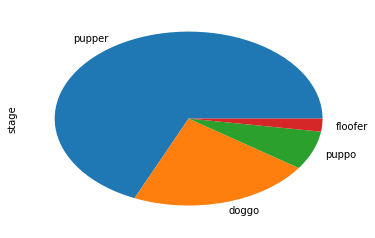

In [84]:
dogstage=twitter_archive_clean[['tweet_id','rating_ratio','favorites','retweets','stage']]
dogstage['stage'].value_counts().plot(kind='pie')
dogstage['stage'].describe()

Puppo has most retweets and pupper has least retweets.

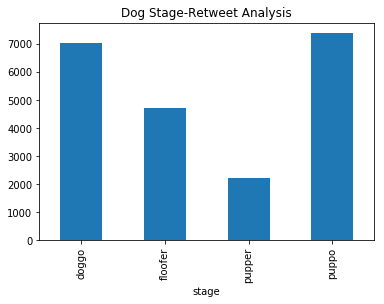

In [85]:
dogstage.groupby('stage')['retweets'].mean().plot(title='Dog Stage-Retweet Analysis',kind='bar')

Puppo has most retweets and pupper has least retweets.

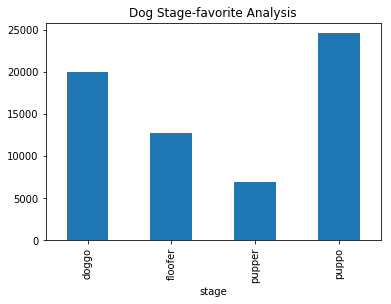

In [86]:
dogstage.groupby('stage')['favorites'].mean().plot(title='Dog Stage-favorite Analysis',kind='bar')

Puppo has most number of favorites  and pupper has least number of  favorites.

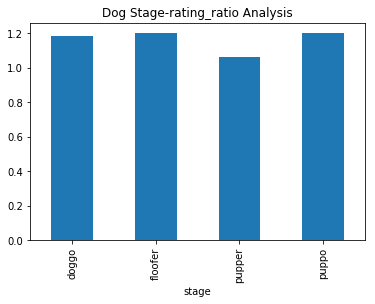

In [87]:
dogstage.groupby('stage')['rating_ratio'].mean().plot(title='Dog Stage-rating_ratio Analysis',kind='bar')

Pupper has the least rating-ratio among the four stages of dog.

# RATING ANALYSIS:

Below shows the Distribution of rating ratio of tweets.

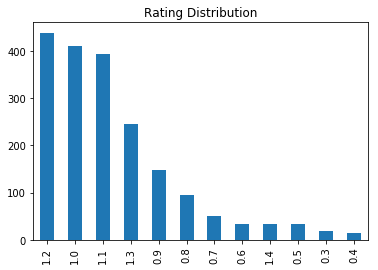

In [88]:
twitter_archive_clean.rating_ratio.value_counts().plot(title='Rating Distribution',kind='bar')

Results shows that more rating are in the range of 1 to 1.3.when ratings decreases ,frequency of rating also decreases.

RATING VS TIME ANALYSIS

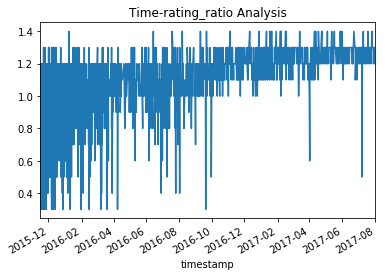

In [89]:
twitter_archive_clean.groupby('timestamp')['rating_ratio'].mean().plot(title='Time-rating_ratio Analysis',kind='line')

Results shows that rating gets improved over time from 2015 to 2017.

RATING VS FAVOURITE AND RETWEET ANALYSIS:

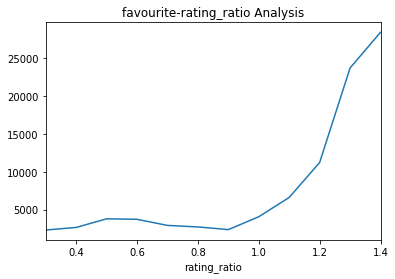

In [90]:
twitter_archive_clean.groupby('rating_ratio')['favorites'].mean().plot(title='favourite-rating_ratio Analysis',kind='line')

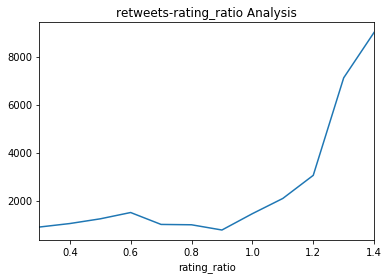

In [91]:
twitter_archive_clean.groupby('rating_ratio')['retweets'].mean().plot(title='retweets-rating_ratio Analysis',kind='line')

Higher the rating ,favourites and retweets are higher.

# Insights:


1.Of all the stages of dog,Pupper has highest frequency stage mentioned in tweets .Doggo has the second highest frequency  mentioned stage.While floofer is least mentioned stage in tweet.

2.Average rating Ratio is around 1.05.Most ratio of rating are between 1 to 1.3.Retweets and favorites are higher for posts with higher rating and retweets and favourites decreases when rating decreases.

3.Puppo has most favorites and retweets even though it is not frequently mentioned in tweets .Pupper has lowest favorites and retweets eventhough it is highest mentioned frequency dog stage.

4.Rating ratio increased with time .Intially there are more poor rating around 2015 which decreased in 2016 and further improved in 2017. 
